# Quadratic Approximation
- We'll ride with grid approximation for a while, but it gets computationally intensive the higher the number of approximations in the grid. For 2 parameters approximated by 100 values each, we have $100^2$ values to compute. For 10 parameters with 100 values to compute, we get billions of values. And it's normal to have models with hundreds or thousands of parameters. Grid approximation is initially helpful but scales poorly.
- With Quadratic Approximation, the region near the peak of the posterior distribution will be nearly Gaussian or "normal" in shape. This means we can approximate by a gaussian distribution
- A gaussian approximation is called "quadratic approximation" b/c of the log(Gaussian distribution) forms a parabola and a parabola is a quadratic function. So this approximation represents any log-posterior with a parabola
- We'll use quadratic approximation for much of the first half of the book.
- It's often very close to correct if not exactly correct.

In [5]:
library(rethinking)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [6]:
globe.qa <- quap(
    alist(
        W ~ dbinom( W+L, p) , # binomial likelihood
        p ~ dunif(0, 1)       # uniform prior (for now, maybe something less blunt later?)
        
    ) , 
    data = list(W=6, L=3)
)

# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666685,0.1571334,0.415539,0.9177979


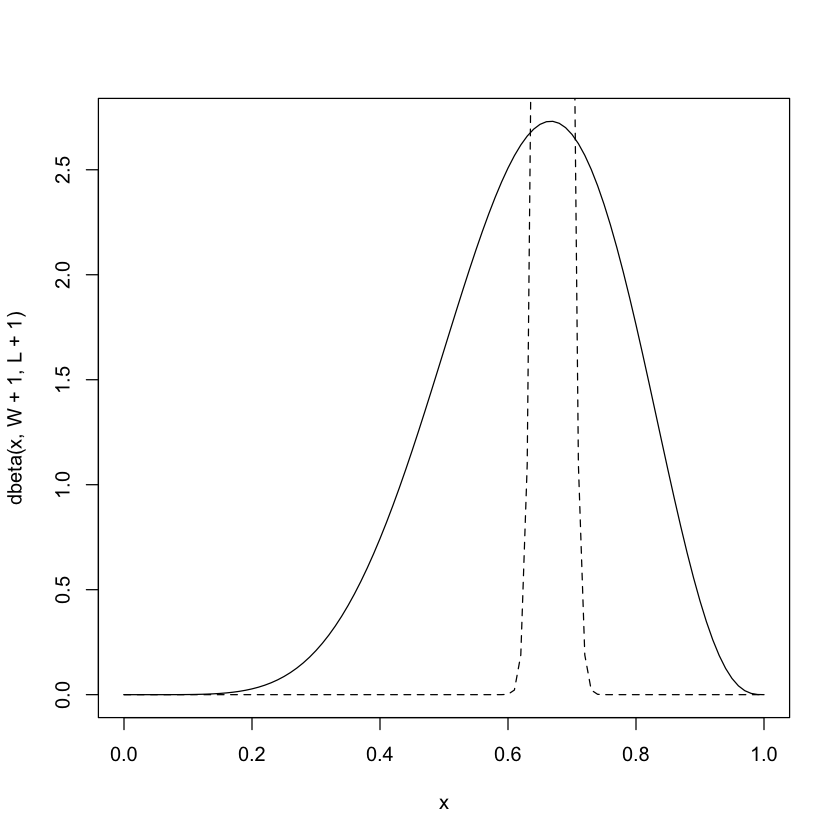

In [12]:
# analytical calculation
W <- 6
L <- 3

curve( dbeta( x, W+1 , L+1 ), from=0, to=1)

#quadratic approximation
curve(dnorm(x, 0.67, .016), lty=2, add=TRUE)



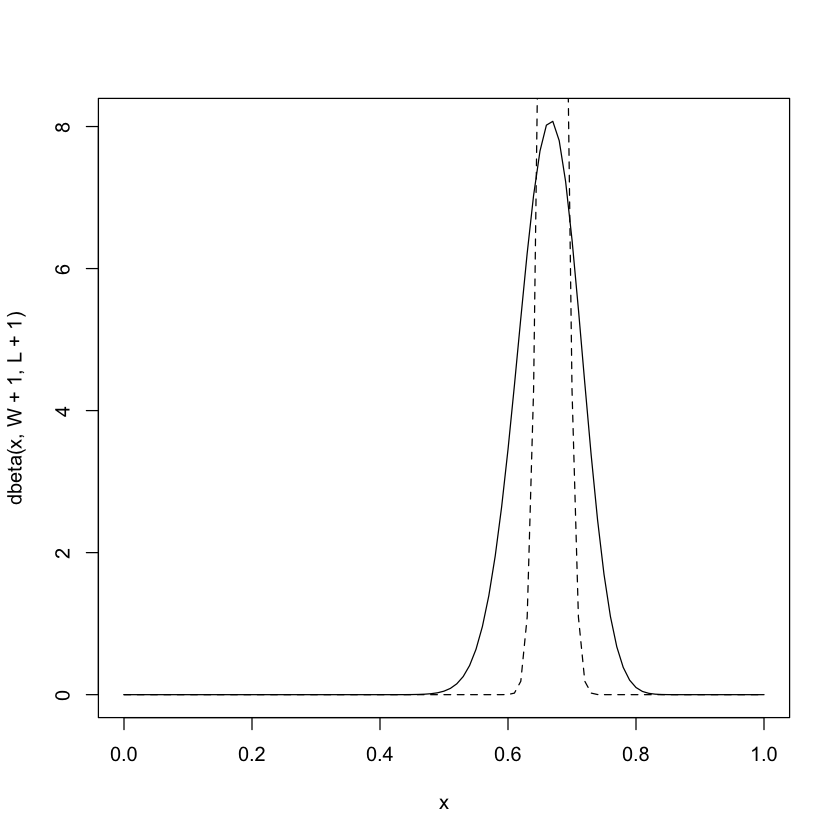

In [13]:
# analytical calculation
W <- 60
L <- 30

curve( dbeta( x, W+1 , L+1 ), from=0, to=1)

#quadratic approximation
curve(dnorm(x, 0.67, .016), lty=2, add=TRUE)

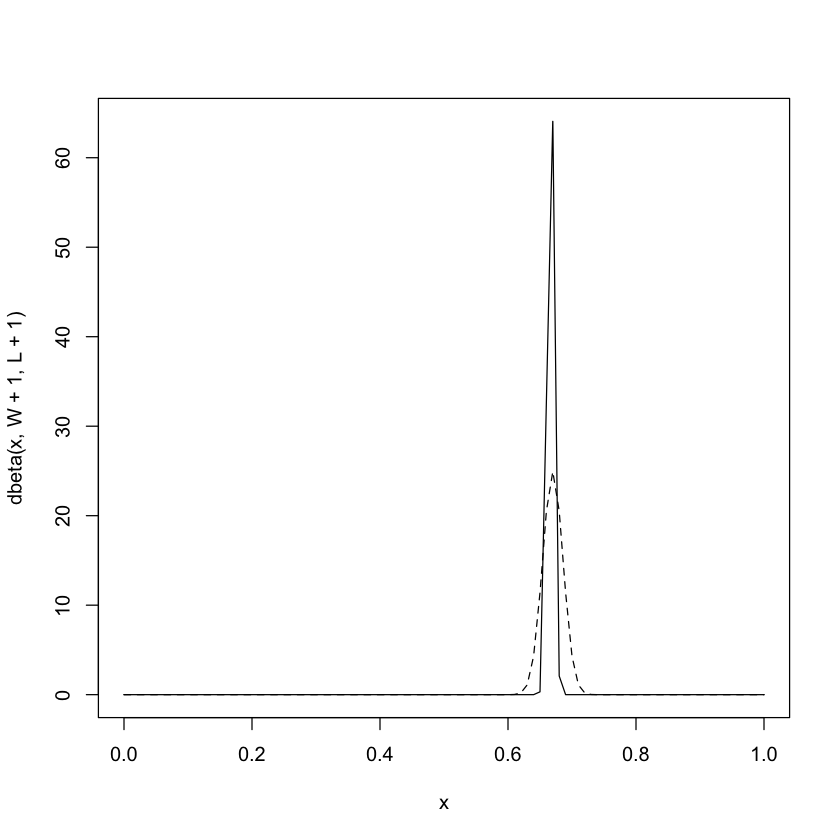

In [14]:
# analytical calculation
W <- 6000
L <- 3000

curve( dbeta( x, W+1 , L+1 ), from=0, to=1)

#quadratic approximation
curve(dnorm(x, 0.67, .016), lty=2, add=TRUE)